# Peroxiredoxin decamer association and dissociation  model

This notebook performs analyses described in the

**Manuscript:**

Modelling the decamerisation cycle of PRDX1 and the inhibition-like effect on its peroxidase activity

**Authors:**

C. Barry, C. Pillay, J. Rohwer

**Purpose:**

Analysis: Simulations with the Prx dimer-decamer model

Plot:  Figure 2

**Requirements:**

Python libraries (see **Imports** below)

Model: Prx dimer-decamer equilibrium model (`Prx_dim-dec.psc`)

##### Imports

In [1]:
import os

import numpy as np
from matplotlib import pyplot as plt
import matplotlib

import pysces


Matplotlib backend set to: "nbAgg"
Matplotlib interface loaded (pysces.plt.m)
Pitcon routines available
NLEQ2 routines available
SBML support available
You are using NumPy (1.23.5) with SciPy (1.9.3)
Assimulo CVode available
RateChar is available
Parallel scanner is available

PySCeS environment
******************
pysces.model_dir = /home/chris/Pysces/psc
pysces.output_dir = /home/chris/Pysces


***********************************************************************
* Welcome to PySCeS (1.1.0) - Python Simulator for Cellular Systems   *
*                http://pysces.sourceforge.net                        *
* Copyright(C) B.G. Olivier, J.M. Rohwer, J.-H.S. Hofmeyr, 2004-2023  *
* Triple-J Group for Molecular Cell Physiology                        *
* Stellenbosch University, ZA and VU University Amsterdam, NL         *
* PySCeS is distributed under the PySCeS (BSD style) licence, see     *
* LICENCE.txt (supplied with this release) for details                *
* Please cite PySCeS with

###### Get directory paths

In [2]:
prev_dir = os.path.split(os.getcwd())[0]

mod_dir = os.path.join(prev_dir,"models")
if not os.path.isdir(mod_dir): os.mkdir(mod_dir) # ensure dir exists
    
fig_dir = os.path.join(os.getcwd(),"Figures")
if not os.path.isdir(fig_dir): os.mkdir(fig_dir) # ensure dir exists


###### Matplotlib stuff

In [3]:
%matplotlib inline

multiplier = 1
mpl_width = 4.5*multiplier
mpl_height = 3.5*multiplier
mpl_dpi = 600
mpl_xlabel_fontsize = "large"
mpl_ylabel_fontsize = "large"
mu = "\u03bc"

###### Common variables

In [4]:
CTC = 0.8 # Critical transition threshold
scan_range = np.linspace(0.1,10,100)

In [5]:
factors = {"M2":1,
            "M4":2,
            "M6":3,
            "M8":4,
            "M10":5,
          "dimers":1,
          "decamers":5}

## Prx dimer-decamer (figure 2)

In [6]:
# Load model
mod_Prx_dim_dec = pysces.model("Prx_dim-dec", dir=mod_dir)
mod_Prx_dim_dec.showModel()


Assuming extension is .psc
Using model directory: /home/chris/Dropbox/Studies/6. PhD/Papers [Chris B]/Decamerisation_cycle_of_PRDX1/Data/models
/home/chris/Dropbox/Studies/6. PhD/Papers [Chris B]/Decamerisation_cycle_of_PRDX1/Data/models/Prx_dim-dec.psc loading ..... 
Parsing file: /home/chris/Dropbox/Studies/6. PhD/Papers [Chris B]/Decamerisation_cycle_of_PRDX1/Data/models/Prx_dim-dec.psc
Info: No reagents have been fixed
Info: "Prx_total_dimers" has been initialised but does not occur in a rate equation
Info: "Kd_app" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . .  done.
Calculating K matrix . . . . . . . no flux conservation
 done.
 

Fixed species
<none>
 

Reaction stoichiometry and rate equations
disso:
	decamers = {5.00000}dimers
	decamers*koff-pow(dimers,exponent)*kon

Species initial values
decamers_init = 0.0000e+00
dimers_init = 1.0000e+01

Parameters
Prx_total_dimers = 1.0000e+01
koff = 1.0000e+00
kon = 1.0000e+00
Kd_app = 1.

In [7]:
# Adjust koff and kon
Kd = 1.58
kon = 1

mod_Prx_dim_dec.kon = kon
mod_Prx_dim_dec.koff = kon*Kd

The model struggles when Kd and exponent are too high. They both need to be adjusted in order to maintain published steady-state behaviour. This combination reproduces published effects while still being computationally viable.

In [8]:
# Do sim
def mod_scan(model, scan_range):
    
    model.scan_in = "dimers_init"
    model.scan_out = ['dimers', 'decamers']
    model.Scan1(scan_range)
    
    return model.scan

scan = mod_scan(mod_Prx_dim_dec, scan_range)

(hybrd) The solution converged.
INFO: using steady-state concentration for species (dimers --> dimers_ss)
INFO: using steady-state concentration for species (decamers --> decamers_ss)

Scanning ...
100 (hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
80 (hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution converged.
(hybrd) The solution conver

/tmp/ipykernel_85275/1690028431.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


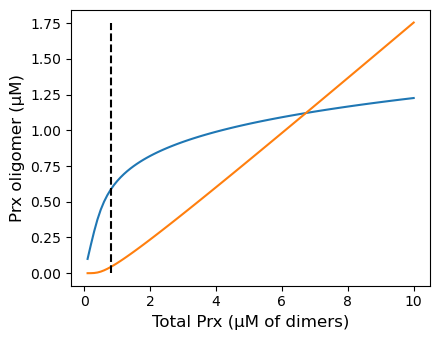

In [9]:
# Plot result
f,axarr = plt.subplots(1,1)
f.set_size_inches(w=mpl_width, h=mpl_height)

ax =  axarr

ax.plot(scan_range,scan.dimers_ss,label = "dimers")
ax.plot(scan_range,scan.decamers_ss,label = "decamers")
ax.plot([CTC,CTC],[0,max(max(scan.dimers_ss),max(scan.decamers_ss))],"k--", label = "CTC")

ax.set_xlabel(f'Total Prx ({mu}M of dimers)',fontsize = mpl_xlabel_fontsize)
ax.set_ylabel(f'Prx oligomer ({mu}M)',fontsize = mpl_ylabel_fontsize)

f.tight_layout()
f.show()
f.savefig(os.path.join(fig_dir, "SS_dim_dec_species_vs_Prx_init.pdf"),dpi= mpl_dpi)

/tmp/ipykernel_85275/3691071783.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


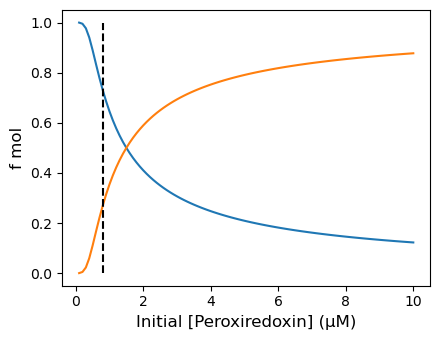

In [10]:
# Plot result
f,axarr = plt.subplots(1,1)
f.set_size_inches(w=mpl_width, h=mpl_height)

for species in scan.dtype.names[1:]:
    x_data = scan["dimers_init"]*factors["dimers"]
    x_mol = scan[species]*factors[species.split("_")[0]]/scan["dimers_init"]
    axarr.plot(x_data, x_mol, label = species)

axarr.plot([CTC,CTC],[0,1],"k--", label = "CTC")

axarr.set_xlabel(f'Initial [Peroxiredoxin] ({mu}M)',fontsize = mpl_xlabel_fontsize)
axarr.set_ylabel("f mol",fontsize = mpl_ylabel_fontsize)

f.tight_layout()
f.show()
